## Import Dataset

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_35968be5e61d41eaba2c6a1fc93a6cef = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2NcCe0FcVz27HiPLXVd7vQR9g1EKGYpVOgnpk84LKCmH',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_35968be5e61d41eaba2c6a1fc93a6cef.get_object(Bucket='predictinglifeexpectancy-donotdelete-pr-gec3cahdnzl1nm',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)



## Preprocessing

In [2]:
df.drop(['Country'],axis=1,inplace=True)

In [3]:
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null float64
GDP                                2490 non-nul

In [6]:
df.isnull().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
df.mean()

Year                               2.007519e+03
Life expectancy                    6.922493e+01
Adult Mortality                    1.647964e+02
infant deaths                      3.030395e+01
Alcohol                            4.602861e+00
percentage expenditure             7.382513e+02
Hepatitis B                        8.094046e+01
Measles                            2.419592e+03
 BMI                               3.832125e+01
under-five deaths                  4.203574e+01
Polio                              8.255019e+01
Total expenditure                  5.938190e+00
Diphtheria                         8.232408e+01
 HIV/AIDS                          1.742103e+00
GDP                                7.483158e+03
Population                         1.275338e+07
 thinness  1-19 years              4.839704e+00
 thinness 5-9 years                4.870317e+00
Income composition of resources    6.275511e-01
Schooling                          1.199279e+01
dtype: float64

In [8]:
df['Life expectancy ']=df['Life expectancy '].fillna(69)
df['Adult Mortality']=df['Adult Mortality'].fillna(164)
df['Alcohol']=df['Alcohol' ].fillna(4)
df['Hepatitis B']=df['Hepatitis B'].fillna(80)
df[' BMI ']=df[' BMI '].fillna(38)
df['Polio']=df['Polio'].fillna(82)
df['Total expenditure']=df['Total expenditure'].fillna(5)
df['Diphtheria ']=df['Diphtheria '].fillna(82)
df['GDP']=df['GDP'].fillna(748)
df['Population']=df['Population'].fillna(12753375)
df['Schooling']=df['Schooling'].fillna(11)
df[' thinness  1-19 years']=df[' thinness  1-19 years'].fillna(4)
df[' thinness 5-9 years']=df[' thinness 5-9 years'].fillna(4)
df['Income composition of resources']=df['Income composition of resources'].fillna(62)

In [9]:
df.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [10]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [11]:
df['Status']=pd.get_dummies(df['Status'],drop_first=True)

In [12]:
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [13]:
#scaling of data

In [14]:
import numpy as np
X=df.drop(['Life expectancy '],axis=1)
y=df['Life expectancy ']

In [15]:
X.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X);
scaler.transform(X);


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
X=pd.DataFrame(X,columns=['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'])

In [18]:
X.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.000000,1.0,0.362881,0.034444,0.0,0.003659,0.653061,0.005439,0.209733,0.0332,0.031250,0.452118,0.649485,0.0,0.004889,0.026074,0.619565,0.603509,0.007726,0.487923
1,0.933333,1.0,0.373961,0.035556,0.0,0.003774,0.622449,0.002319,0.203940,0.0344,0.572917,0.453279,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.007677,0.483092
2,0.866667,1.0,0.369806,0.036667,0.0,0.003759,0.642857,0.002027,0.198146,0.0356,0.614583,0.450377,0.639175,0.0,0.005287,0.024525,0.637681,0.617544,0.007581,0.478261
3,0.800000,1.0,0.375346,0.038333,0.0,0.004014,0.673469,0.013135,0.192352,0.0372,0.666667,0.473012,0.670103,0.0,0.005608,0.002857,0.644928,0.628070,0.007468,0.473430
4,0.733333,1.0,0.379501,0.039444,0.0,0.000364,0.683673,0.014200,0.187717,0.0388,0.677083,0.435287,0.680412,0.0,0.000519,0.002302,0.655797,0.635088,0.007323,0.458937


In [19]:
#removing all the column whose p-value is less than 0.05 
#after feature selection
X.drop(['percentage expenditure','Year','Total expenditure','Population',' thinness 5-9 years','Income composition of resources'],axis=1,inplace=True)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.9, random_state=42)

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
pred=lm.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
#rmse
from math import sqrt
sqrt(mean_squared_error(y_test,pred))

4.408169947168818

In [24]:
predictions = lm.predict(X_test)
errors = abs(predictions - y_test)
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('AcAcuracy:', round(accuracy, 2), '%.')

AcAcuracy: 94.97 %.


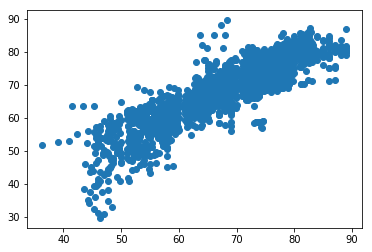

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.scatter(y_test,predictions)

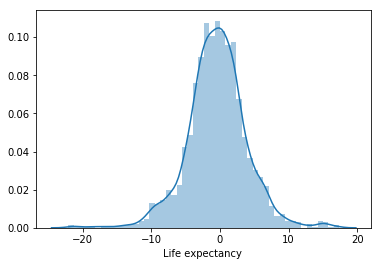

In [26]:
sns.distplot((y_test-predictions),bins=50)

### Feature selection

In [27]:
import statsmodels.api as sm

In [28]:
X2=sm.add_constant(X)
est=sm.OLS(y,X2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     921.6
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        17:29:13   Log-Likelihood:                -8303.9
No. Observations:                2938   AIC:                         1.664e+04
Df Residuals:                    2923   BIC:                         1.673e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    57.99

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Ensemble models

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Decision Tree Regressor

In [30]:
dtree=DecisionTreeRegressor()

In [31]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [32]:
pred=dtree.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error
sqrt(mean_absolute_error(y_test,pred))

1.6975574580117805

In [34]:
predictions = dtree.predict(X_test)
errors = abs(predictions - y_test)
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.55 %.


### Random forest

In [35]:
rfc=RandomForestRegressor(n_estimators=100)

In [36]:
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [37]:
pred=rfc.predict(X_test)

In [38]:
sqrt(mean_absolute_error(y_test,pred))

1.4641944564938156

In [39]:
predictions = rfc.predict(X_test)
errors = abs(predictions - y_test)
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.66 %.


###  AdaBoostRegressor

In [40]:
from sklearn.ensemble import AdaBoostRegressor

In [41]:
ada=AdaBoostRegressor(n_estimators=100)

In [42]:
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None)

In [43]:
sqrt(mean_absolute_error(y_test,ada.predict(X_test)))

1.6216160485664621

In [44]:
predictions = ada.predict(X_test)
errors = abs(predictions - y_test)
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.93 %.


### GradientBoostingRegressor

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

In [46]:
gbr=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')

In [47]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [48]:
sqrt(mean_absolute_error(y_test,gbr.predict(X_test)))

1.6348589790240138

In [49]:
predictions = gbr.predict(X_test)
errors = abs(predictions - y_test)
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.86 %.


### BaggingRegressor

In [50]:
from sklearn.ensemble import BaggingRegressor

In [51]:
bag=BaggingRegressor(n_estimators=100)

In [52]:
bag.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [53]:
sqrt(mean_absolute_error(y_test,bag.predict(X_test)))

1.4589779419719395

In [55]:
predictions = bag.predict(X_test)
errors = abs(predictions - y_test)
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.7 %.


### After trying different model *Random Forest* gave the maximum accuracy and hence selected for deploynment

Model deployed on IBM cloud , Waston Studio service and Integreted with NODE-RED

https://noderedsumit.eu-gb.mybluemix.net/ui/#!/0?socketid=9MHwkgnQcAwqr_WeAAAp